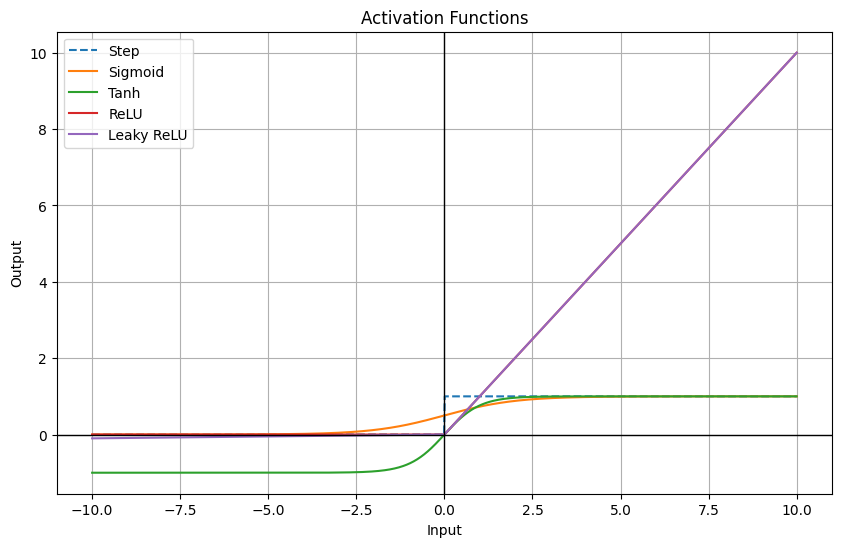

In [ ]:
#ANN 1 Activation
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Generate x values
x = np.linspace(-10, 10, 1000)

# Compute y values for each function
y_step = step(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky = leaky_relu(x)

# Plot all functions in one figure
plt.figure(figsize=(10, 6))
plt.plot(x, y_step, label='Step', linestyle='--')
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_leaky, label='Leaky ReLU')

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()


In [ ]:
#ANN 2 Backpropagation Feedforward
import numpy as np

# Activation and derivative
def sigmoid(x): return 1 / (1 + np.exp(-x))
def dsigmoid(x): return x * (1 - x)  # derivative (x already passed through sigmoid)

# XOR Input & Output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights & biases
np.random.seed(0)
w1 = np.random.rand(2, 2)   # input to hidden
w2 = np.random.rand(2, 1)   # hidden to output
b1 = np.random.rand(1, 2)
b2 = np.random.rand(1, 1)

# Training loop
for _ in range(10000):
    # Feedforward
    h = sigmoid(np.dot(X, w1) + b1)       # hidden layer
    o = sigmoid(np.dot(h, w2) + b2)       # output layer

    # Backpropagation
    error = y - o
    d_o = error * dsigmoid(o)             # output delta
    d_h = d_o.dot(w2.T) * dsigmoid(h)     # hidden delta

    # Update weights and biases
    w2 += h.T.dot(d_o)
    w1 += X.T.dot(d_h)
    b1 += np.sum(d_h, axis=0, keepdims=True)
    b2 += np.sum(d_o, axis=0, keepdims=True)

# Final output
print("Output after training:\n", o)


Output after training:
 [[0.01305838]
 [0.98884064]
 [0.98883857]
 [0.01148127]]


In [ ]:
#ANN 3 ART
import numpy as np

class ART1:
    def __init__(self, input_size, vigilance=0.8):
        self.input_size = input_size
        self.vigilance = vigilance
        self.weights = []  # list of weight vectors for each category

    def match_score(self, input_vec, weight_vec):
        return np.sum(np.minimum(input_vec, weight_vec)) / np.sum(input_vec)

    def train(self, inputs):
        for inp in inputs:
            matched = False
            for idx, w in enumerate(self.weights):
                if self.match_score(inp, w) >= self.vigilance:
                    # Update weights (intersection of old and new input)
                    self.weights[idx] = np.minimum(w, inp)
                    matched = True
                    print(f"Input {inp} matched with Category {idx}")
                    break
            if not matched:
                self.weights.append(inp.copy())
                print(f"Input {inp} created new Category {len(self.weights)-1}")

    def display_categories(self):
        print("\nFinal Categories (Weight Vectors):")
        for i, w in enumerate(self.weights):
            print(f"Category {i}: {w}")

# Sample binary inputs
inputs = np.array([
    [1, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 1, 0, 0],
])

model = ART1(input_size=4, vigilance=0.8)
model.train(inputs)
model.display_categories()


Input [1 0 1 0] created new Category 0
Input [1 1 1 0] created new Category 1
Input [0 1 0 1] created new Category 2
Input [0 1 0 0] matched with Category 1

Final Categories (Weight Vectors):
Category 0: [1 0 1 0]
Category 1: [0 1 0 0]
Category 2: [0 1 0 1]


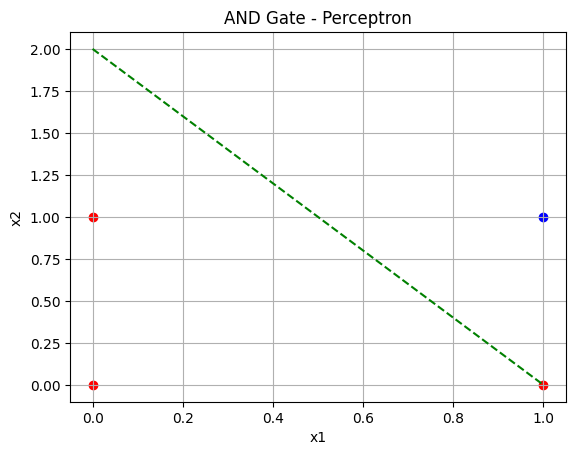

In [ ]:
#ANN 4 Perceptron

import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
  def __init__(self, input_size, lr=0.1, epochs=100):
    self.weights = np.zeros(input_size + 1)
    self.lr = lr
    self.epochs = epochs


  def predict(self,x):
    z = np.dot(x, self.weights[1:]) + self.weights[0]
    return 1 if z>=0 else 0

  def train(self,X ,y):
    for _ in range(self.epochs):
      for xi,target in zip(X,y):
        update = self.lr*(target - self.predict(xi))
        self.weights[1:] += update*xi
        self.weights[0] += update


X = np.array([[0,0], [0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
p = Perceptron(input_size=2)
p.train(X,y)

for xi, label in zip(X, y):
    color = 'blue' if label == 1 else 'red'
    plt.scatter(xi[0], xi[1], color=color)

# Decision boundary
x_vals = np.array([0, 1])
y_vals = -(p.weights[0] + p.weights[1]*x_vals) / p.weights[2]
plt.plot(x_vals, y_vals, 'g--')  # Green dashed line

plt.title("AND Gate - Perceptron")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


In [1]:
#MIDS 1st
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading Dataset
td = pd.read_csv(r"/content/Titanic-Dataset.csv")
td.head()

# Mapping Genders
td['Sex'] = td['Sex'].map({'male':0,'female':1})
td.head()

# Age more than 25
a100 = td['Age']>25
td[a100]

# Missing Values
td["Cabin"] = td["Cabin"].fillna("General")
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,General,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,General,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,General,S


In [2]:
#MIDS 2nd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import re

# 1. Load Dataset
df = pd.read_csv("/content/Twitter.csv")  # Replace with your file name

# 2. Basic Preprocessing (lowercase + remove special characters)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation, numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['post_text'].apply(clean_text)  # Assuming the text column is named 'text'


# 4. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42)

# 5. Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

# 6. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_vectors, y_train)

# 7. Prediction & Evaluation
predictions = knn.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1981
           1       0.77      0.85      0.81      2019

    accuracy                           0.79      4000
   macro avg       0.80      0.79      0.79      4000
weighted avg       0.80      0.79      0.79      4000



In [3]:
#MIDS 3
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load CSV datasets (replace with actual paths)
train_df = pd.read_csv('/content/train.csv')  # should have 'text' and 'label'
test_df = pd.read_csv('/content/test.csv')    # should have 'text' and 'label'

# Define a condition (e.g., based on a variable or your choice)
use_stopwords = True  # Set to True or False based on your preference

# Conditionally set the stop_words parameter
if use_stopwords:
    vectorizer = CountVectorizer(stop_words='english')
else:
    vectorizer = CountVectorizer()

# Vectorize the training and testing text data
train_vectors = vectorizer.fit_transform(train_df['Content'])
test_vectors = vectorizer.transform(test_df['Content'])

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(train_vectors, train_df['Label'])

# Make predictions on the test data
predictions = model.predict(test_vectors)

# Evaluate the model
print(classification_report(test_df['Label'], predictions))


              precision    recall  f1-score   support

         neg       0.77      0.86      0.82       100
         pos       0.84      0.75      0.79       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [6]:
#MIDS 4 Abalone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

abalone = pd.read_csv("/content/abalone.csv")
abalone.head()

# Encode 'Sex' categorical feature
label_encoder = LabelEncoder()
abalone['Sex'] = label_encoder.fit_transform(abalone['Sex'])

# Add 'Age' column = Rings + 1.5 (as per UCI site)
abalone['Age'] = abalone['Rings'] + 1.5

# Features and target
X = abalone.drop(['Rings', 'Age'], axis=1)
y_rings = abalone['Rings']
y_age = abalone['Age']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_rings, test_size=0.2, random_state=42)

# Train model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluation
print("Regression for Rings")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Use same X, y_age
X_train, X_test, y_train, y_test = train_test_split(X, y_age, test_size=0.2, random_state=42)

# Train model
age_model = LinearRegression()
age_model.fit(X_train, y_train)

# Predict
age_pred = age_model.predict(X_test)

# Evaluation
print("\nRegression for Age")
print("MSE:", mean_squared_error(y_test, age_pred))
print("R^2 Score:", r2_score(y_test, age_pred))

Regression for Rings
MSE: 5.062537954095237
R^2 Score: 0.5323381317508205

Regression for Age
MSE: 5.062537954095237
R^2 Score: 0.5323381317508205
